 <h1 align="center">Find a car Park</h1>

 <h3 align="center">Authors: Noa Aizer & Ido Shapira & Shay Leyzerovich</h3>   

In this project we propose to develop a model for identifying whether there is free space in theparking lot image, or whether the parking is full.

# Report:

In this project we have classification problem. We wish to recognize whether the parking spot is full or free in an image. Our data set contains a huge amount of parking spots images. Therefore our features will be the images pixels and the label divided to free and full.

**Preprocessing: Preparing Data:**

In order to use the data we needed to make some adjustments.

- In the first stage we imported the data, we tried to work with RGB data but it was too heavy to handle on our computer, so we used grayscale images but we've got lower results so we decided to stay with our original images. Another thing is that the data was too big and cause hardware and memory problems- there was too many images and all of them with high quality.
  Thus we resized the pictures and took some samples from the data instead of all the images in the dataset. 
- In the next stage we did label encoding: 1 for free , 0 for full.
- We normalize all the data in order to clean noise from the images.
- In addition, we defined a random seed in order to compare between the logistic model and the MLP model. 
- After that , we divide the set into two parts: 80% for training and 20% for testing. We decided not to make validation data because of our low hardware.

**Building the logistic regression model:**

At first, we build a basic model for our problem and check the results.
- We improved the model by changing the function to sigmoid instead of the function we saw in class. 
- In order to Faced the problem of overfitting/underfitting we reduced the number of iteration and handle the learning rate until we have got a nice decreacing of our loss function.
- The logistic model got 86% correct on the testing set after training.
- According to the confusion matrix we can conclude it was more difficult for the logistic model to identify images of free parking than full parking images.  

**Building the MLP (Multi-Layer Perceptron) model:**

-	We build the network with 2 hidden layers ; the first hidden layer has 256 neurons and the second has 128 neurons. 
-	We used the relu activation function to bring more power to the model.
-	We tryed the dropout function to avoid over fitting but the train error was very high and it extended the time of the model training, so in the end we decided not to use it.
-	The MLP model got 90% correct on the testing set after training.
-	In the beginning we use a low learning rate and because of that we never got to the minimum loss. In order to fix that we  choose a bigger learning  rate.
-	We weren’t satisfied with the results and in order to improve them:
    -	 we changed the amount of iterations - to avoid over fitting
    -	 we changed the size and amount of hidden layers.

**Comparison to the logistic regression model:**

We've saw that the MLP got better results but it is more complex model than the logistic regression, therefore it took more time to train it.


You can find more specific details, screenshots and plots during the code below.

## Code & Explanations:

### Import all the necessary libraries:
We have used Python libraries:
- tensorflow v1
- sklearn

In [1]:
import tensorflow.compat.v1 as tf
# import tensorflow as tf
import cv2
import os
from tqdm import tqdm
import numpy as np
import random as rn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rs = 42 # random seed

### fix random seed:

In [2]:
np.random.seed(rs)
rn.seed(rs)
tf.set_random_seed(rs)

### import the data:

In [3]:
X = []
Z = []
IMG_SIZE=150

FREE_DIR='/home/ido/Desktop/Find-a-Car-Park/data/Free'
FULL_DIR='/home/ido/Desktop/Find-a-Car-Park/data/Full'

In [4]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = plt.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        np_img=np.asarray(img)
        X.append(np_img)
        Z.append(str(label))

In [5]:
# make 'Full' data
make_train_data('Full',FULL_DIR)
print(len(X))

100%|██████████| 2195/2195 [00:20<00:00, 104.63it/s]

2195


In [6]:
# make 'Free' data
make_train_data('Free',FREE_DIR)
print(len(X))

100%|██████████| 1067/1067 [00:09<00:00, 109.39it/s]

3262


### The description of the data:

1. Number of instances: 3262

2. Number of attributes: 67500 (150*150*3)

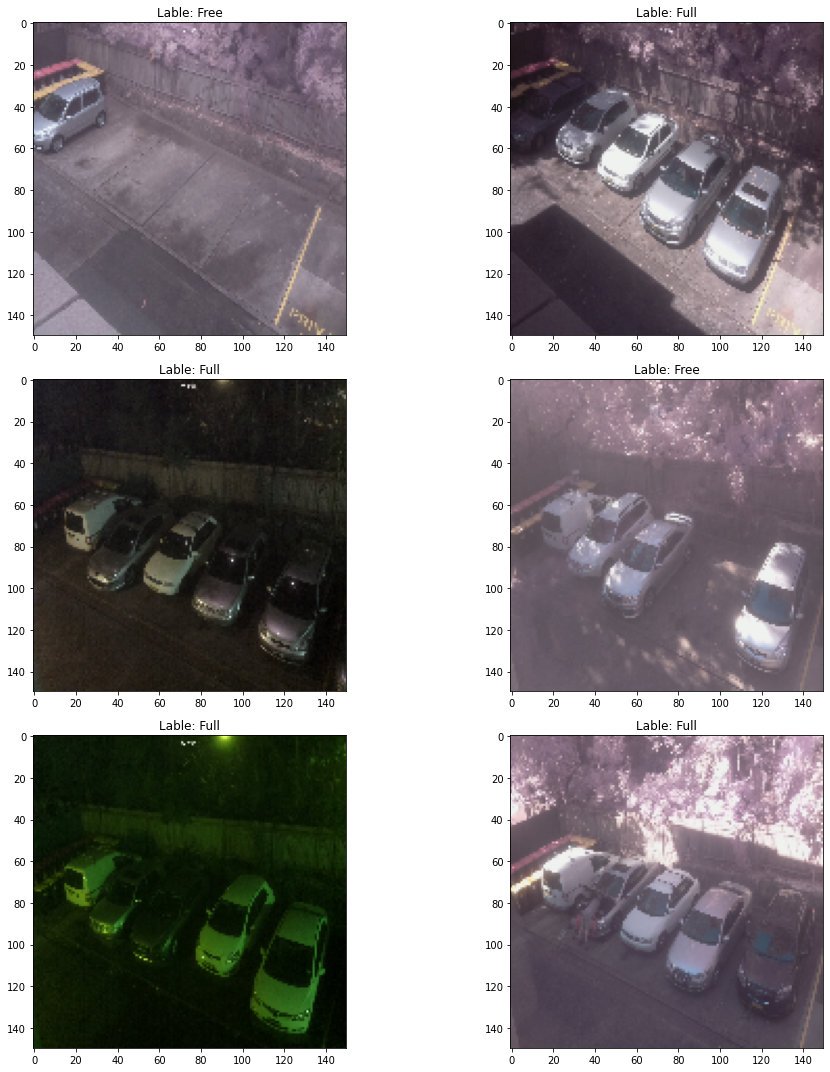

In [7]:
# check some image
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Lable: '+Z[l])
        
plt.tight_layout()

### Label encoding of the target:
'Full' = 0

'Free' = 1

In [8]:
Y = np.array(Z)
Y = np.where(Y=='Full', 0, Y)
Y = np.where(Y=='Free', 1, Y)
Y = Y.astype('int32')

### normalization and flatten the images:

In [9]:
X = np.array([cv2.normalize(X[i], None, 0, 255, cv2.NORM_MINMAX) for i in range(len(X))]) # normalization
X=np.array(X)/255
X = X.flatten().reshape(len(X), (IMG_SIZE ** 2) * 3) # 3 is because it is RGB image 
# X = X.flatten().reshape(len(X), (IMG_SIZE ** 2)) 

#### our dataset:

In [10]:
df = pd.DataFrame(data=X)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.294118,0.176471,0.243137,0.278431,0.164706,0.227451,0.286275,0.176471,0.215686,0.294118,...,0.960784,0.945098,0.972549,0.972549,0.223529,0.215686,0.282353,0.164706,0.145098,0.215686
1,0.474510,0.337255,0.372549,0.498039,0.356863,0.388235,0.501961,0.333333,0.384314,0.454902,...,0.211765,0.411765,0.274510,0.235294,0.356863,0.211765,0.203922,0.333333,0.188235,0.184314
2,0.298039,0.184314,0.243137,0.313725,0.227451,0.254902,0.266667,0.160784,0.207843,0.262745,...,0.349020,0.376471,0.329412,0.231373,0.211765,0.164706,0.078431,0.376471,0.313725,0.266667
3,0.588235,0.384314,0.482353,0.670588,0.439216,0.549020,0.741176,0.494118,0.631373,0.639216,...,0.274510,0.243137,0.168627,0.219608,0.176471,0.105882,0.160784,0.270588,0.188235,0.223529
4,0.219608,0.176471,0.227451,0.235294,0.188235,0.250980,0.203922,0.164706,0.219608,0.247059,...,0.172549,0.376471,0.439216,0.435294,0.592157,0.780392,0.780392,0.792157,0.964706,0.960784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,0.517647,0.364706,0.466667,0.533333,0.368627,0.470588,0.541176,0.384314,0.482353,0.498039,...,0.364706,0.360784,0.298039,0.349020,0.360784,0.286275,0.345098,0.360784,0.274510,0.317647
3258,0.290196,0.188235,0.223529,0.282353,0.176471,0.203922,0.282353,0.203922,0.211765,0.301961,...,0.160784,0.211765,0.211765,0.262745,0.227451,0.227451,0.282353,0.266667,0.254902,0.325490
3259,0.541176,0.407843,0.458824,0.545098,0.403922,0.454902,0.521569,0.372549,0.431373,0.498039,...,0.325490,0.301961,0.227451,0.278431,0.258824,0.176471,0.247059,0.207843,0.113725,0.164706
3260,0.392157,0.278431,0.356863,0.470588,0.333333,0.407843,0.443137,0.321569,0.400000,0.458824,...,0.321569,0.352941,0.298039,0.317647,0.301961,0.258824,0.266667,0.258824,0.211765,0.215686


We can see that the size of an image is 150 \* 150 \* 3 = 67500 that later it would be our featrues in our models.

In [11]:
X.shape

(3262, 67500)

### Train-Test Split:

In [12]:
# separate data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=rs, shuffle=True)

freqs = pd.DataFrame({"Training dataset": [(y_train == 1).sum(),(y_train == 0).sum()],
                      "Test dataset": [(y_test == 1).sum(),(y_test == 0).sum()],
                      "Total": [(y_train == 1).sum()+(y_test == 1).sum(),(y_train == 0).sum()+(y_test == 0).sum()]},
                     index=["Free", "Full"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Free,863,204,1067
Full,1746,449,2195


We'll build a classifier with two classes: "full",
so we create the according labels.

In [13]:
labels_train = (np.arange(2) == y_train[:,None]).astype(np.float32)
labels_test = (np.arange(2) == y_test[:,None]).astype(np.float32)

Define a function that calculate the statistics:

In [14]:
def statistics(confusion):
    TP = sess.run(confusion[1, 1])
    TN = sess.run(confusion[0, 0])
    FP = sess.run(confusion[0, 1])
    FN = sess.run(confusion[1, 0])
    print('True Positives (TP):',TP)
    print('True Negatives (TN):',TN)
    print('False Positives (FP):',FP)
    print('False Negarives (FN):',FN)
    print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
    precision = TN / float(TN + FP)
    print('Precision:',precision)
    recall = TP / float(TP + FN)
    print('Recall:', recall)
    print('f-score:', 2 * precision * recall / (precision + recall))

### Begin building the Logistic-Regression model using tensorflow.v1:

1. Define placeholders

In [15]:
tf.compat.v1.disable_eager_execution()
data = tf.placeholder(dtype=tf.float32, shape=[None, X.shape[1]])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

2. Declare the variables that need to be learned and initialization.
   
   The number of variable is the number of the features (X.shape[1], 1)

In [16]:
W = tf.Variable(tf.zeros(shape=[X.shape[1], 1])) # tf.random_normal maybe better
b = tf.Variable(tf.zeros(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

3. Declare the model you need to learn

In [17]:
mod = tf.add(tf.matmul(data, W), b)
# y = 1 / (1.0 + tf.exp(-(tf.matmul(data,W) + b))) # tf.nn.sigmoid(tf.matmul(data,W) + b)

4. Define the requires parameters:
    - learning rate
    - batch_size
    - number of iteration

In [18]:
learning_rate = 0.003
batch_size = 128
iter_num = 850

5. Loss function and optimizer:
    
    We use the sigmoid cross-entropy loss function,
    
    meaning, first doing a sigmoid on the model result and then using the cross-entropy loss function.

In [19]:
# We want to minimize the loss function using the Gradient-Decent method
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

6. Define the accuracy

In [20]:
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

### End of the definition of the model framework

In [21]:
# Define the variable that saves the result
loss_trace = []
train_acc = []
test_acc = []

### Start training the  Logistic-Regression model:

In [22]:
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    sess.run(optimizer, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
    # output
    if (epoch + 1) % 50 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:   50 loss: 0.435215 train_acc: 0.773860 test_acc: 0.779479
epoch:  100 loss: 0.468024 train_acc: 0.792641 test_acc: 0.797856
epoch:  150 loss: 0.359847 train_acc: 0.817171 test_acc: 0.803982
epoch:  200 loss: 0.468420 train_acc: 0.752779 test_acc: 0.773354
epoch:  250 loss: 0.344399 train_acc: 0.842852 test_acc: 0.828484
epoch:  300 loss: 0.332117 train_acc: 0.842852 test_acc: 0.854518
epoch:  350 loss: 0.279847 train_acc: 0.871982 test_acc: 0.860643
epoch:  400 loss: 0.334233 train_acc: 0.884630 test_acc: 0.857580
epoch:  450 loss: 0.309067 train_acc: 0.894979 test_acc: 0.868300
epoch:  500 loss: 0.221778 train_acc: 0.872748 test_acc: 0.874426
epoch:  550 loss: 0.254588 train_acc: 0.845918 test_acc: 0.846861
epoch:  600 loss: 0.268418 train_acc: 0.880031 test_acc: 0.880551
epoch:  650 loss: 0.236667 train_acc: 0.903795 test_acc: 0.894334
epoch:  700 loss: 0.285662 train_acc: 0.915293 test_acc: 0.901991
epoch:  750 loss: 0.214719 train_acc: 0.924875 test_acc: 0.895865
epoch:  80

### Visualization of the loss function results:

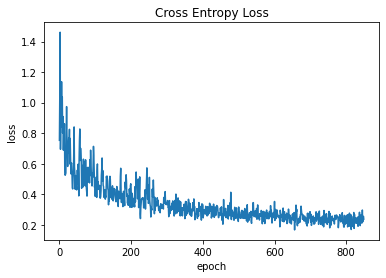

In [23]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

We can see that the loss value reduce during the train, there's a graph that shows that.

In [24]:
y_predictions = sess.run(prediction, feed_dict={data: X_test, target: np.matrix(y_test).T})

In [25]:
tf.compat.v1.math.confusion_matrix
confusion = tf.math.confusion_matrix(y_test, y_predictions, num_classes=2, dtype=tf.int32)
print(sess.run(confusion))

[[410  39]
 [ 30 174]]


In [26]:
statistics(confusion)

True Positives (TP): 174
True Negatives (TN): 410
False Positives (FP): 39
False Negarives (FN): 30
Classification Accuracy: 0.8943338437978561
Precision: 0.9131403118040089
Recall: 0.8529411764705882
f-score: 0.8820147620637216


The results indicate that the model could not recognize a lot of free parking spot because of the recall but when it did the precision was high.

### Begin building the MLP model using tensorflow.v1:

1. Define placeholders

In [60]:
tf.compat.v1.disable_eager_execution()
X = tf.placeholder("float", shape=[None, X_train.shape[1]])
y = tf.placeholder("float", shape=[None, 2])

2. Define the structure of the net and initialization.

In [61]:
# Layer's sizes
x_size = X_train.shape[1]   # The number of pixels in the image
y_size = 2   # Number of outcomes ('Free' or 'Full')

# First layer
hid1_size = 256
w1 = tf.Variable(tf.random_normal([hid1_size, x_size], stddev=0.01), name='w1')
b1 = tf.Variable(tf.constant(0.1, shape=(hid1_size, 1)), name='b1')
# y1 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(X)), b1)), keep_prob=0.5)
y1 = tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(X)), b1))

# Second layer
hid2_size = 128
w2 = tf.Variable(tf.random_normal([hid2_size, hid1_size], stddev=0.01), name='w2')
b2 = tf.Variable(tf.constant(0.1, shape=(hid2_size, 1)), name='b2')
# y2 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w2, y1), b2)), keep_prob=0.5)
y2 = tf.nn.relu(tf.add(tf.matmul(w2, y1), b2))

# Output layer
wo = tf.Variable(tf.random_normal([y_size, hid2_size], stddev=0.01), name='wo')
bo = tf.Variable(tf.random_normal([y_size, 1]), name='bo')
yo = tf.transpose(tf.add(tf.matmul(wo, y2), bo))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

5. Define the requires parameters:
    - learning rate
    - batch_size
    - number of iteration

In [62]:
learning_rate = 0.003
batch_size = 128
iter_num = 650

3. Loss function and optimizer (Back Propagation):

In [63]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yo))
updates = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

4. Define the accuracy

In [64]:
predict = tf.argmax(yo, axis=1)

### End of the definition of the model framework

In [65]:
# Define the variable that saves the result
loss_trace = []
train_acc = []
test_acc = []

### Start training the MLP model:

In [66]:
for epoch in range(iter_num):
    avg_loss = 0.0
    
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(labels_train[batch_index])
    
    for i in range(batch_train_X.shape[0]):
        sess.run(updates, feed_dict={X: batch_train_X[i: i + 1], y: batch_train_y[i: i + 1]})
        temp_loss = sess.run(loss, feed_dict={X: batch_train_X[i, None], y: batch_train_y[i, None]})
        avg_loss += temp_loss
    
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = np.mean(np.argmax(labels_train, axis=1) == sess.run(predict, feed_dict={X: X_train, y: labels_train}))
    temp_test_acc  = np.mean(np.argmax(labels_test, axis=1) == sess.run(predict, feed_dict={X: X_test, y: labels_test}))
    avg_loss /= batch_train_X.shape[0]
    
    # recode the result
    loss_trace.append(avg_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
    # output
    if (epoch + 1) % 50 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, avg_loss, temp_train_acc, temp_test_acc))

epoch:   50 loss: 0.092926 train_acc: 0.871215 test_acc: 0.857580
epoch:  100 loss: 0.054709 train_acc: 0.954005 test_acc: 0.915773
epoch:  150 loss: 0.048524 train_acc: 0.972020 test_acc: 0.941807
epoch:  200 loss: 0.014883 train_acc: 0.972787 test_acc: 0.955590
epoch:  250 loss: 0.011425 train_acc: 0.972020 test_acc: 0.929556
epoch:  300 loss: 0.006012 train_acc: 0.981602 test_acc: 0.958652
epoch:  350 loss: 0.008910 train_acc: 0.981985 test_acc: 0.957121
epoch:  400 loss: 0.004346 train_acc: 0.987735 test_acc: 0.960184
epoch:  450 loss: 0.001360 train_acc: 0.993867 test_acc: 0.964778
epoch:  500 loss: 0.003090 train_acc: 0.996167 test_acc: 0.967841
epoch:  550 loss: 0.003791 train_acc: 0.935991 test_acc: 0.908116
epoch:  600 loss: 0.002040 train_acc: 0.996934 test_acc: 0.967841
epoch:  650 loss: 0.003392 train_acc: 0.988501 test_acc: 0.960184


### Visualization of the loss function results:

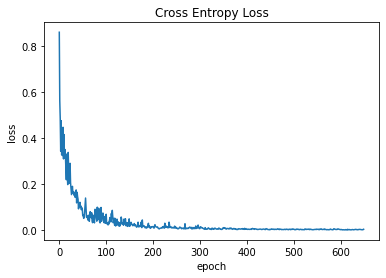

In [67]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [68]:
y_predictions = sess.run(predict, feed_dict={X: X_test, y: labels_test})

In [69]:
confusion = tf.math.confusion_matrix(y_test, y_predictions, num_classes=2, dtype=tf.int32)
print(sess.run(confusion))

[[430  19]
 [  7 197]]


In [70]:
statistics(confusion)

True Positives (TP): 197
True Negatives (TN): 430
False Positives (FP): 19
False Negarives (FN): 7
Classification Accuracy: 0.9601837672281777
Precision: 0.9576837416481069
Recall: 0.9656862745098039
f-score: 0.961668360077878
